# MAPIANDO

In [2]:
import pandas as pd

In [3]:
data = pd.DataFrame({'vegetales':
                     [
                         'lechuga', 'tomate', 'morrón rojo', 'morrón verde', 'brócoli', 'acelga', 'zapallo', 'papa', 'espinaca'
                     ],
                     'precio_kg':
                     [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

data

,vegetales,precio_kg
0,lechuga,4.0
1,tomate,3.0
2,morrón rojo,12.0
3,morrón verde,6.0
4,brócoli,7.5
5,acelga,8.0
6,zapallo,3.0
7,papa,5.0
8,espinaca,6.0


In [4]:
vegetal_a_color = {
    'lechuga': 'verde',
    'tomate': 'rojo',
    'morrón rojo': 'rojo',
    'morrón verde': 'verde',
    'brócoli': 'verde',
    'zapallo': 'naranja'
}

In [5]:
data['color'] = data['vegetales'].map(vegetal_a_color)
data

,vegetales,precio_kg,color
0,lechuga,4.0,verde
1,tomate,3.0,rojo
2,morrón rojo,12.0,rojo
3,morrón verde,6.0,verde
4,brócoli,7.5,verde
5,acelga,8.0,NaN
6,zapallo,3.0,naranja
7,papa,5.0,NaN
8,espinaca,6.0,NaN


# DISCRETIZACIÓN Y BINNING

In [6]:
edades = [20, 22, 25, 27, 21, 23, 37, 61, 45, 41, 32]
edades

[20, 22, 25, 27, 21, 23, 37, 61, 45, 41, 32]

In [8]:
# Defino los límites de las categorías
bins = [18, 25, 35, 60, 100]

#Categorizo cada dato
cats = pd.cut(edades, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (35, 60], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 11
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [9]:
# Los códigos son números asignados a las categorías, en orden ascendente
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 3, 2, 2, 1], dtype=int8)

# Variables Dummies
Pasamos variables "categóricas" a variables numéricas

In [11]:
df = pd.DataFrame({'animales': ['jirafa', 'jirafa', 'koala', 'oso', 'koala', 'jirafa'],
                  'unDato': range(6)})
df

,animales,unDato
0,jirafa,0
1,jirafa,1
2,koala,2
3,oso,3
4,koala,4
5,jirafa,5


In [12]:
# Arma una matriz, donde indica si un animal está presente o no en cada uno de los datos
pd.get_dummies(df)

,unDato,animales_jirafa,animales_koala,animales_oso
0,0,1,0,0
1,1,1,0,0
2,2,0,1,0
3,3,0,0,1
4,4,0,1,0
5,5,1,0,0


# Scikit Learn - Transformación de datos

In [19]:
# Label Encoder
# Transforma una lista de nombres en una lista numerada

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# El fit va a revisar cuántas clases existen en la serie, y va a numerarlas
le.fit(["paris", "paris", "tokio", "amsterdam"])

list(le.classes_)

le.transform(["tokio", "tokio", "paris"])
list(le.inverse_transform([2,2,1]))




array([2, 2, 0], dtype=int64)

In [21]:
integer_encoded = le.fit_transform(["paris", "paris", "tokio", "amsterdam"])
integer_encoded

array([1, 1, 2, 0], dtype=int64)

In [26]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# La lista se hace vertical en vez de horizontal
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)

# Esto genera una matriz de YxY (cada columna es una ciudad)
# Si en esa posición aparece la ciudad, tenemos un uno en la posición
onehot_encoder = onehot_encoder.fit_transform(integer_encoded)

[[1]
 [1]
 [2]
 [0]]


In [28]:
onehot_encoder

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [43]:
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

In [8]:
from numpy import nan
import numpy as np

X = np.array([[nan, 0, 98],
             [3,7,99],
            [3, 5, 210],
            [4, nan, 202],
            [8,8,101]])

X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [49]:
# Completamos los NAN con el promedio de los valores de la columna

imp = SimpleImputer(strategy="mean") #defino el promedio como estrategia para llenar los NANs
X2 = imp.fit_transform(X)

X2

array([[  4.5,   0. ,  98. ],
       [  3. ,   7. ,  99. ],
       [  3. ,   5. , 210. ],
       [  4. ,   5. , 202. ],
       [  8. ,   8. , 101. ]])

In [55]:
# Pipelínes (o Páiplain)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler #Técnica de preprocesamiento. Escalar los datos si estos están separados en rango (ESTANDARIZA)

pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

In [57]:
X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [59]:
pipe.fit(X)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [1]:
pipe.fit_transform(X)

NameError: name 'pipe' is not defined

In [3]:
import seaborn as sns

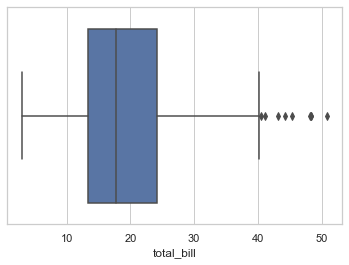

In [6]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

#Boxplot
ax = sns.boxplot(x = tips["total_bill"])

In [21]:
q75, q25 = np.percentile(tips.total_bill, [75, 25])
iqr = q75 - q25

# Máximo y mínimo con base en los cuartiles primero y cuarto
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)


In [22]:
tips.total_bill[tips.total_bill < min]

Series([], Name: total_bill, dtype: float64)

In [18]:
tips.total_bill[tips.total_bill > max]

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

# `Z-SCORE` (normalización de los datos)

### Promedio de edad: 20
### Desviación estándar: 5
### Alumna: 35 años

### Z-Score de la alumna: z = (valor - promedio) / desviación
### z = (35 - 20) / 5 = 3

Útil para filtrar outliers. Si el valor normalizado está por encima de un valor establecido, o por debajo, entonces lo podremos considerar fuera de rango y eliminarlo